In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
model_name = "SVC"

In [22]:
df = pd.read_csv("../Data/Crop_production 2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [23]:
df = df.drop(["Unnamed: 0"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [24]:
for i in df.columns:
    print(f"{i},Unique Values:-{df[i].unique()},\n{df[i].nunique()} unique values.")

State_Name,Unique Values:-['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'goa' 'gujarat'
 'haryana' 'jammu and kashmir' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'tamil nadu' 'telangana' 'uttar pradesh'
 'west bengal' 'chandigarh' 'dadra and nagar haveli' 'himachal pradesh'
 'puducherry' 'sikkim' 'tripura' 'andaman and nicobar islands'
 'chhattisgarh' 'uttarakhand' 'jharkhand'],
33 unique values.
Crop_Type,Unique Values:-['kharif' 'rabi' 'summer' 'whole year'],
4 unique values.
Crop,Unique Values:-['cotton' 'horsegram' 'jowar' 'maize' 'moong' 'ragi' 'rice' 'sunflower'
 'wheat' 'sesamum' 'soyabean' 'rapeseed' 'jute' 'arecanut' 'onion'
 'potato' 'sweetpotato' 'tapioca' 'turmeric' 'barley' 'banana' 'coriander'
 'garlic' 'blackpepper' 'cardamom' 'cashewnuts' 'blackgram' 'coffee'
 'ladyfinger' 'brinjal' 'cucumber' 'grapes' 'mango' 'orange' 'papaya'
 'tomato' 'cabbage' 'bottlegourd' 'pineapple' 'carro

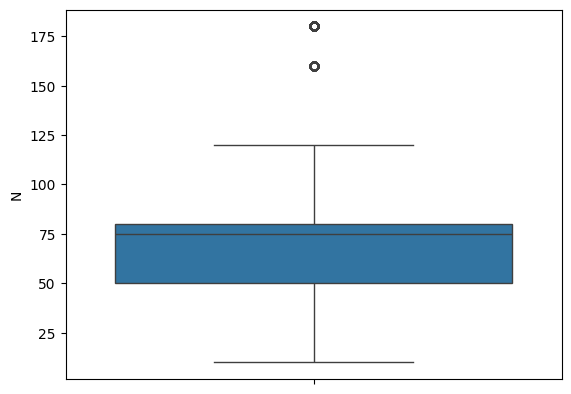

Outlier counter and percentage for N: (5441, 5.449228334785526)


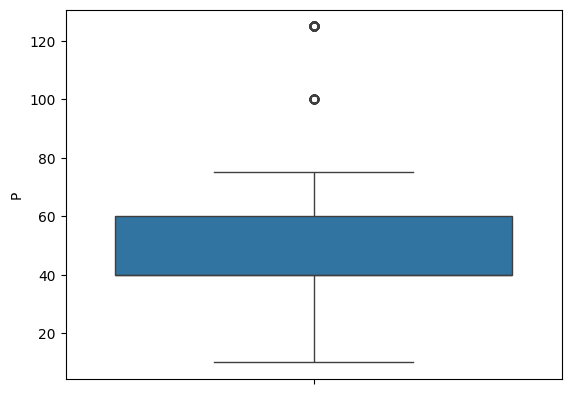

Outlier counter and percentage for P: (152, 0.15222986709931996)


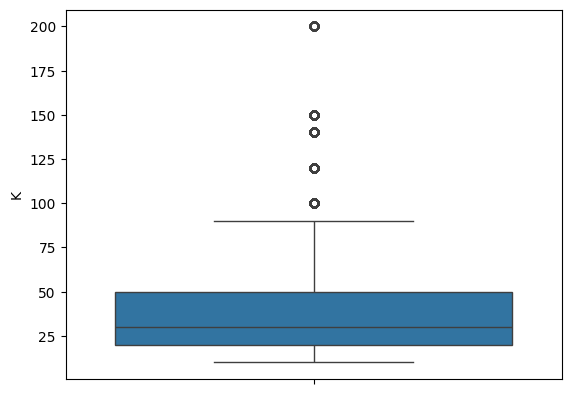

Outlier counter and percentage for K: (7090, 7.100722090356439)


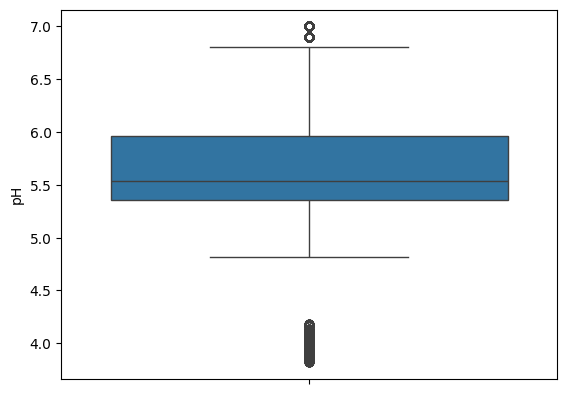

Outlier counter and percentage for pH: (1355, 1.3570491442077537)


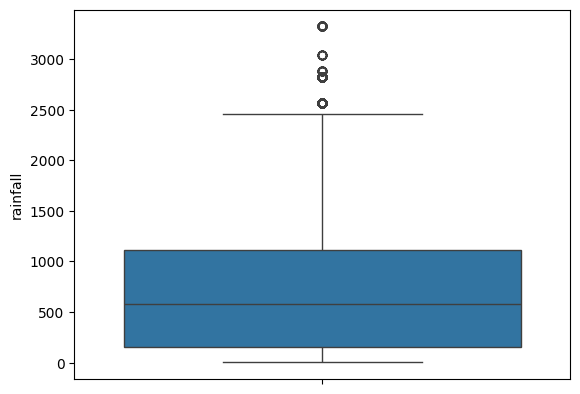

Outlier counter and percentage for rainfall: (1952, 1.9549519774860038)


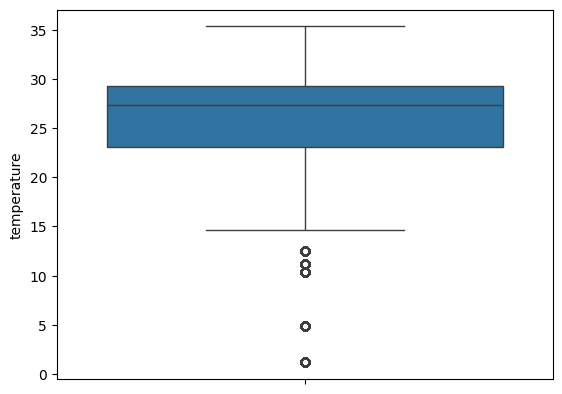

Outlier counter and percentage for temperature: (1596, 1.5984136045428599)


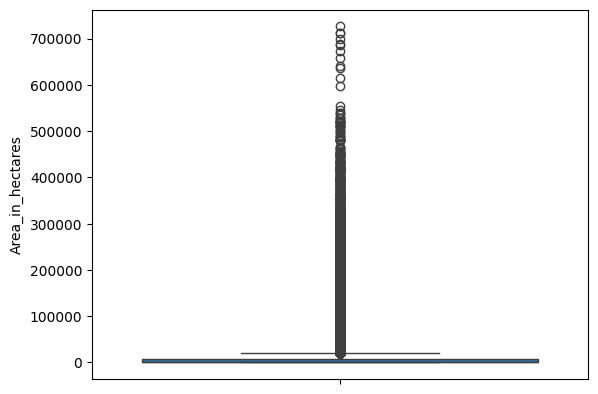

Outlier counter and percentage for Area_in_hectares: (16668, 16.693206742180696)


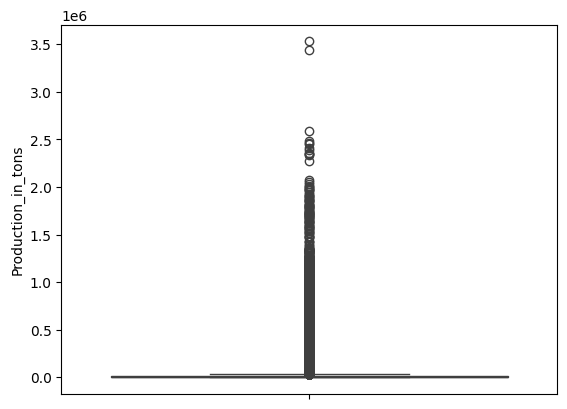

Outlier counter and percentage for Production_in_tons: (16912, 16.93757573936644)


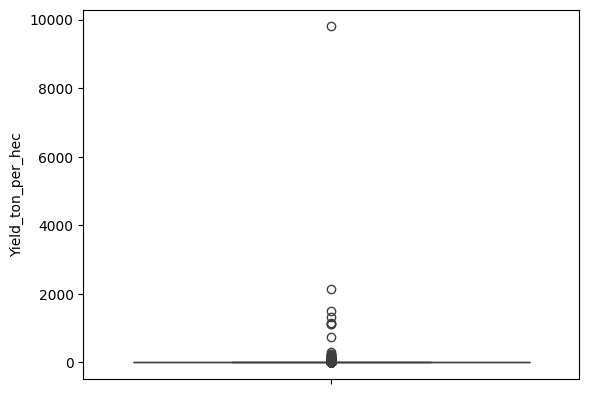

Outlier counter and percentage for Yield_ton_per_hec: (14792, 14.814369698244349)


In [25]:
def outlier_info(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    return outlier_count, outlier_percentage

def outlier_remover(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(df[i])
        plt.show()
        print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


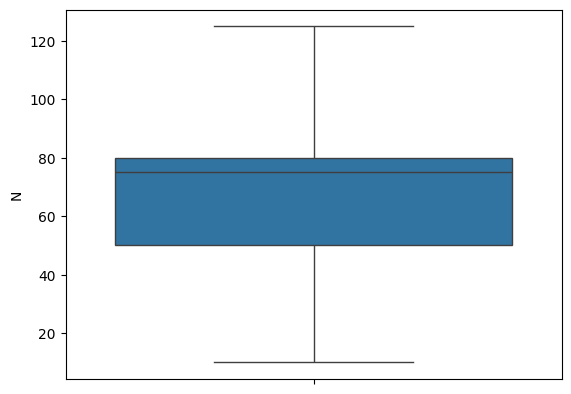

Outlier counter and percentage for N: (0, 0.0)


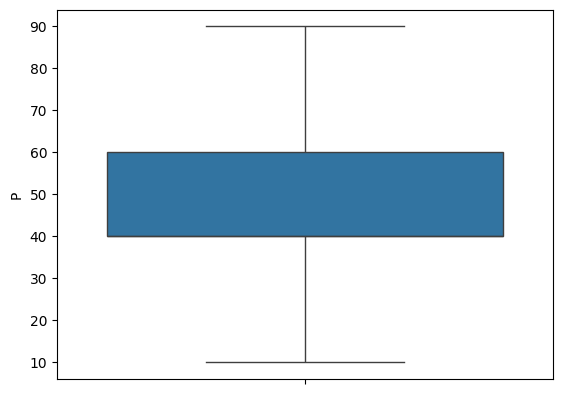

Outlier counter and percentage for P: (0, 0.0)


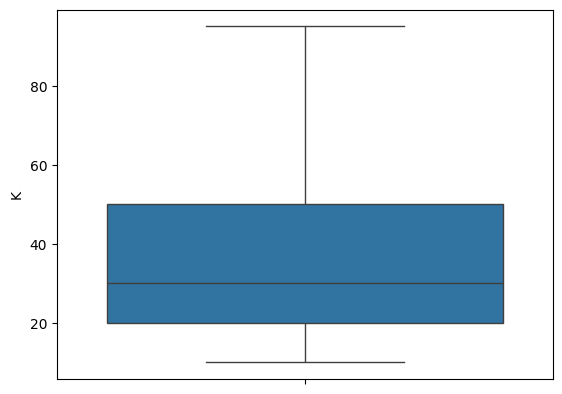

Outlier counter and percentage for K: (0, 0.0)


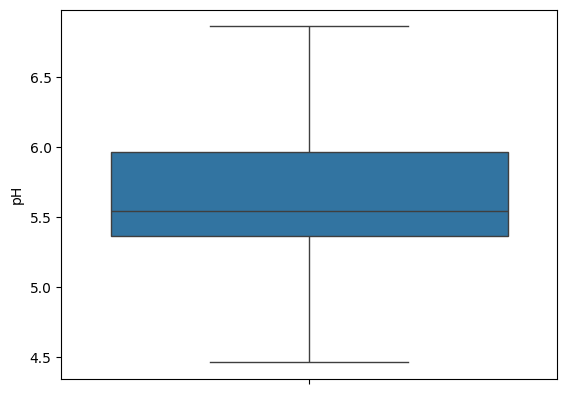

Outlier counter and percentage for pH: (0, 0.0)


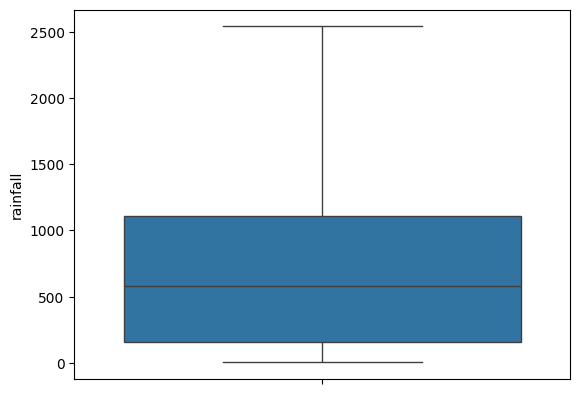

Outlier counter and percentage for rainfall: (0, 0.0)


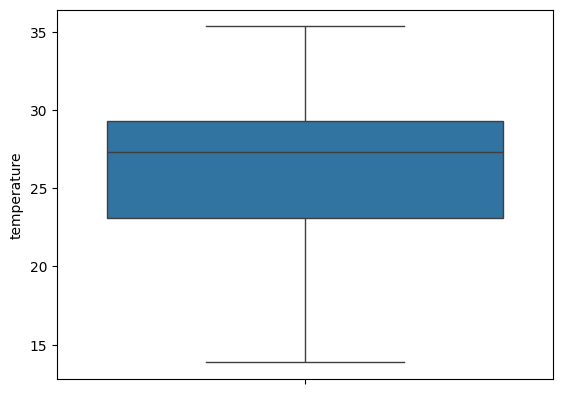

Outlier counter and percentage for temperature: (0, 0.0)


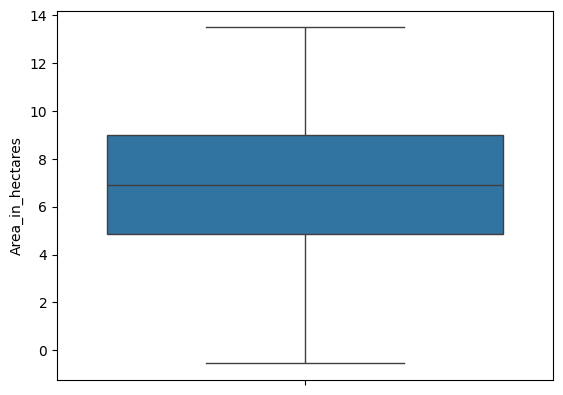

Outlier counter and percentage for Area_in_hectares: (0, 0.0)


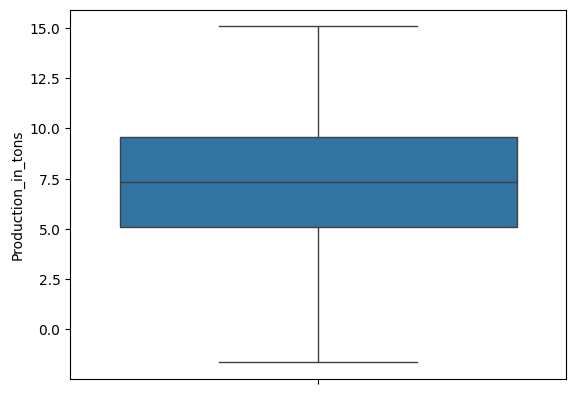

Outlier counter and percentage for Production_in_tons: (0, 0.0)


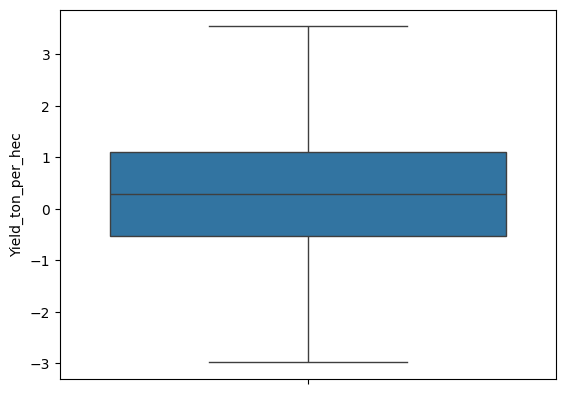

Outlier counter and percentage for Yield_ton_per_hec: (0, 0.0)


In [26]:
df["Area_in_hectares"] = np.log(df["Area_in_hectares"])
df["Production_in_tons"] = np.log(df["Production_in_tons"])
df["Yield_ton_per_hec"] = np.log(df["Yield_ton_per_hec"])


df = outlier_remover(df,"N")
df = outlier_remover(df,"P")
df = outlier_remover(df,"K")
df = outlier_remover(df,"pH")
df = outlier_remover(df,"rainfall")
df = outlier_remover(df,"temperature")
df = outlier_remover(df,"Area_in_hectares")
df = outlier_remover(df,"Production_in_tons")
df = outlier_remover(df,"Yield_ton_per_hec")

for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(df[i])
        plt.show()
        print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


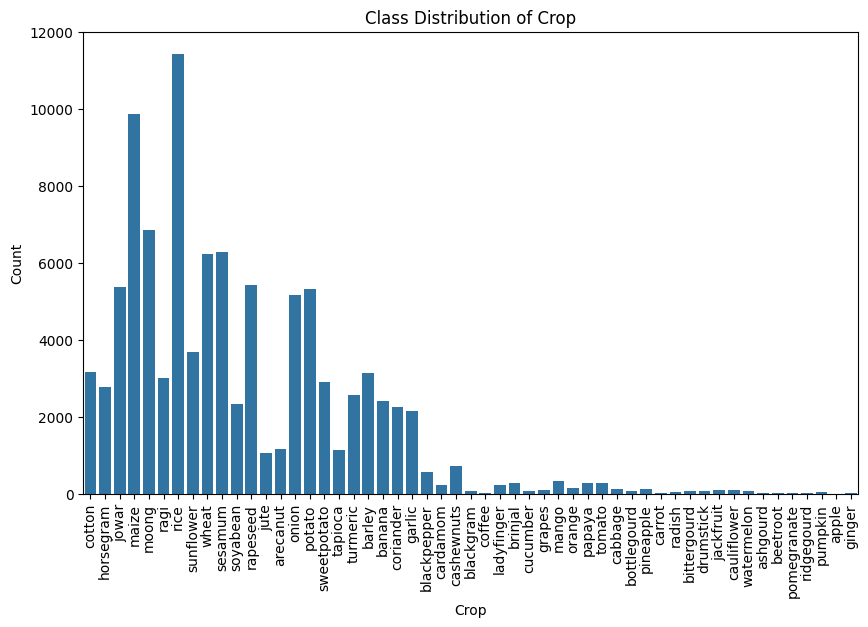

In [27]:
# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Crop'])
plt.title('Class Distribution of Crop')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [28]:
tt = df["Crop"].value_counts()
print(tt)
df = df[df["Crop"] != "apple"]
df = df[df["Crop"] != "coffee"]
tt = df["Crop"].value_counts()
print(tt)

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C = ["State_Name","Crop_Type","Crop"]
le_D = {}
for i in C:
    le_D[i] = LabelEncoder()
    df[i] = le_D[i].fit_transform(df[i])

bulk_scaler = StandardScaler()
features_to_scale = ["State_Name","Crop_Type","N","P","K","pH","rainfall","temperature","Area_in_hectares","Production_in_tons","Yield_ton_per_hec"]
#features_to_scale = ["N","P","K","pH","rainfall","temperature","Area_in_hectares","Yield_ton_per_hec"]
df[features_to_scale] = bulk_scaler.fit_transform(df[features_to_scale])

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99840 non-null  float64
 1   Crop_Type           99840 non-null  float64
 2   Crop                99840 non-null  int32  
 3   N                   99840 non-null  float64
 4   P                   99840 non-null  float64
 5   K                   99840 non-null  float64
 6   pH                  99840 non-null  float64
 7   rainfall            99840 non-null  float64
 8   temperature         99840 non-null  float64
 9   Area_in_hectares    99840 non-null  float64
 10  Production_in_tons  99840 non-null  float64
 11  Yield_ton_per_hec   99840 non-null  float64
dtypes: float64(11), int32(1)
memory usage: 9.5 MB


State_Name               33
Crop_Type                 4
Crop                     51
N                        14
P                        12
K                        12
pH                       82
rainfall                107
temperature             105
Area_in_hectares      26342
Production_in_tons    33212
Yield_ton_per_hec     71528
dtype: int64

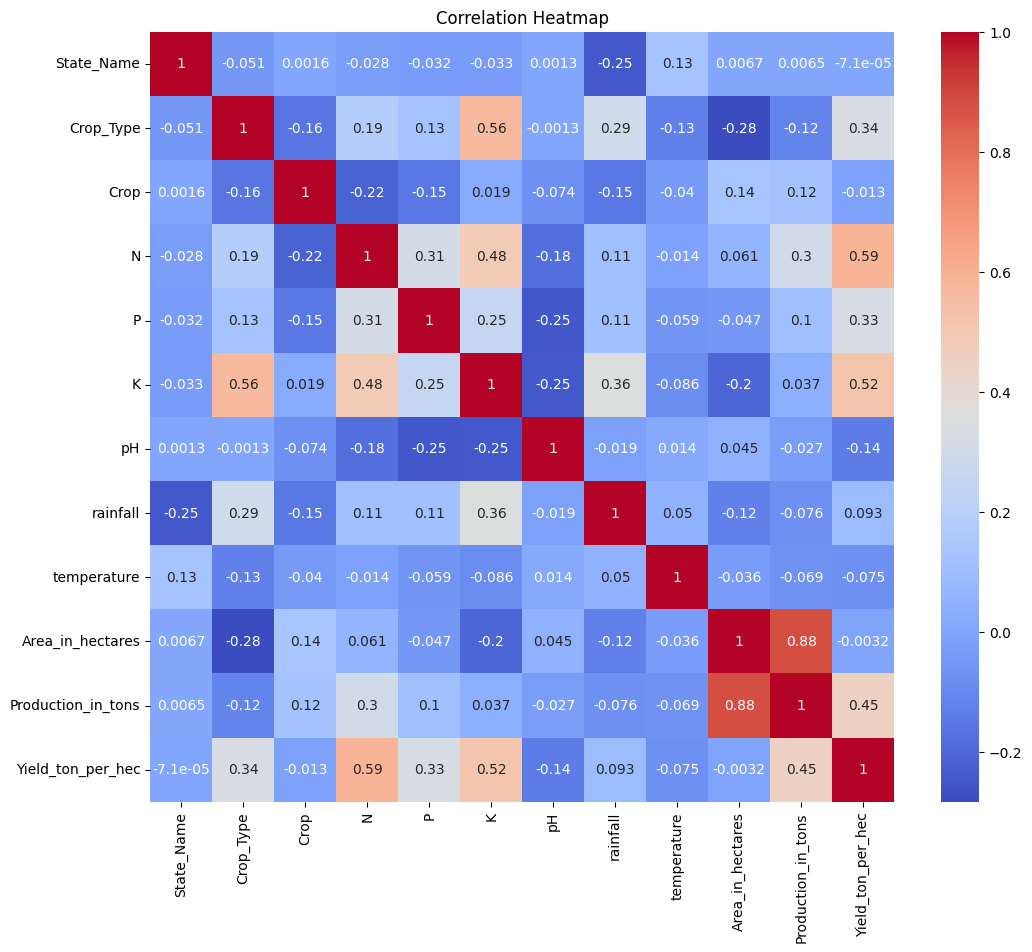

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
from sklearn.decomposition import PCA,IncrementalPCA

t = df[["Production_in_tons","Area_in_hectares"]].values
pca = PCA(n_components=1)
X_pca = pca.fit_transform(t)

df = df.drop(["Production_in_tons","Area_in_hectares","Yield_ton_per_hec"],axis=1)
df["PCA"] = X_pca

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State_Name   99840 non-null  float64
 1   Crop_Type    99840 non-null  float64
 2   Crop         99840 non-null  int32  
 3   N            99840 non-null  float64
 4   P            99840 non-null  float64
 5   K            99840 non-null  float64
 6   pH           99840 non-null  float64
 7   rainfall     99840 non-null  float64
 8   temperature  99840 non-null  float64
 9   PCA          99840 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 8.0 MB


In [32]:
from collections import Counter
from imblearn.over_sampling import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.calibration import calibration_curve
from scipy.interpolate import make_interp_spline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek,SMOTEENN

data = df

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA
from IPython.display import Image, display

def plot_tsne_pca(features, targets, target_names, name, sample_size=1000):
    # Subsample the data for faster computation
    if len(features) > sample_size:
        idx = np.random.choice(len(features), sample_size, replace=False)
        features_sampled = features[idx]
        targets_sampled = targets[idx]
    else:
        features_sampled = features
        targets_sampled = targets

    # TSNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
    tsne_results = tsne.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(tsne_results[targets_sampled == i, 0], tsne_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("t-SNE")
    plt.grid()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_tsne.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_tsne_legend.png', bbox_inches='tight')
    plt.close()
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_tsne.png'))
    display(Image(f'../Results/{name}_tsne_legend.png'))
    
    # PCA
    pca = IncrementalPCA(n_components=2)
    pca_results = pca.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(pca_results[targets_sampled == i, 0], pca_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("PCA")
    plt.grid()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_pca.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_pca_legend.png', bbox_inches='tight')
    plt.close()
    display(Image(f'../Results/{name}_pca.png'))
    display(Image(f'../Results/{name}_pca_legend.png'))

def plot_radar_chart(metrics_df, name):
    labels = metrics_df['Class']
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for metric in metrics_df.columns[1:]:
        values = metrics_df[metric].tolist()
        values += values[:1]
        ax.plot(angles, values, label=metric)
        ax.fill(angles, values, alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Metrics Radar Chart')
    plt.savefig(f"../Results/{name}_radar_chart.png")
    plt.show()

def compute_metrics(val_target, val_predicted, num_classes):
    precision, recall, f1, _ = precision_recall_fscore_support(val_target, val_predicted, average=None, labels=range(num_classes), zero_division=1)
    metrics = {
        'Class': range(num_classes),
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    return pd.DataFrame(metrics)

def train_validation(train_features, test_features, train_target, test_target, name, num_neighbors=5):
    model = SVC()
    model.fit(train_features, train_target)

    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)

    train_accuracy = np.mean(train_predicted == train_target)
    test_accuracy = np.mean(test_predicted == test_target)

    print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    all_metrics = []
    fold_metrics = compute_metrics(test_target, test_predicted, model.classes_.size)
    all_metrics.append(fold_metrics)
    avg_metrics = pd.concat(all_metrics).groupby('Class').mean().reset_index()
    avg_metrics['Class'] = le_D['Crop'].inverse_transform(avg_metrics['Class'].astype(int))
    plot_radar_chart(avg_metrics, name)

    val_target_onehot = pd.get_dummies(test_target).values
    roc_auc_dict = {}

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(val_target_onehot[:, i], model.decision_function(test_features)[:, i])
        roc_auc_dict[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {le_D["Crop"].inverse_transform([i])[0]} (area = {roc_auc_dict[i]:0.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_roc_curve.png', bbox_inches='tight')
    plt.close()

    fig_legend = plt.figure(figsize=(8, 6))
    plt.axis('off')
    legend = plt.figlegend(handles, labels, loc='center', ncol=5)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_roc_curve_legend.png', bbox_inches='tight')
    plt.close()

    display(Image(f'../Results/{name}_roc_curve.png'))
    display(Image(f'../Results/{name}_roc_curve_legend.png'))

    target_names = model.classes_
    plot_tsne_pca(train_features, train_target, target_names=target_names, name=name)

    return model

def cross_check(features, target, name, k=10, num_neighbors=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(features)):
        train_features, val_features = features[train_idx], features[val_idx]
        train_target, val_target = target[train_idx], target[val_idx]
        
        model = SVC()
        model.fit(train_features, train_target)
        
        train_predicted = model.predict(train_features)
        val_predicted = model.predict(val_features)

        train_accuracy = np.mean(train_predicted == train_target)
        val_accuracy = np.mean(val_predicted == val_target)

        # Compute additional metrics
        train_precision = precision_score(train_target, train_predicted, average='weighted', zero_division=0)
        train_recall = recall_score(train_target, train_predicted, average='weighted', zero_division=0)
        train_f1 = f1_score(train_target, train_predicted, average='weighted', zero_division=0)

        val_precision = precision_score(val_target, val_predicted, average='weighted', zero_division=0)
        val_recall = recall_score(val_target, val_predicted, average='weighted', zero_division=0)
        val_f1 = f1_score(val_target, val_predicted, average='weighted', zero_division=0)
        
        conf_mat_train = confusion_matrix(train_target, train_predicted)
        conf_mat_val = confusion_matrix(val_target, val_predicted)
        tnr_per_class_train = []
        tnr_per_class_val = []
        for i in range(len(conf_mat_train)):
            tn = np.sum(np.delete(np.delete(conf_mat_train, i, axis=0), i, axis=1))
            fp = np.sum(np.delete(conf_mat_train[:, i], i))
            tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
            tnr_per_class_train.append(tnr)
        for i in range(len(conf_mat_val)):
            tn = np.sum(np.delete(np.delete(conf_mat_val, i, axis=0), i, axis=1))
            fp = np.sum(np.delete(conf_mat_val[:, i], i))
            tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
            tnr_per_class_val.append(tnr)
        
        train_tnr = np.mean(tnr_per_class_train)
        val_tnr = np.mean(tnr_per_class_val)

        fold_results.append({
            'fold': fold+1,
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_tnr': train_tnr,
            'train_f1': train_f1,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_tnr': val_tnr,
            'val_f1': val_f1
        })

        print(f'Fold {fold+1}, Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%')
        print(f'Fold {fold+1}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train Negative Rate: {train_tnr:.4f}, Train F1: {train_f1:.4f}')
        print(f'Fold {fold+1}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation Negative Rate: {val_tnr:.4f}, Validation F1: {val_f1:.4f}')

    # Visualization of k-fold cross-validation results
    train_accuracies = [result['train_accuracy'] for result in fold_results]
    val_accuracies = [result['val_accuracy'] for result in fold_results]
    train_precisions = [result['train_precision'] for result in fold_results]
    val_precisions = [result['val_precision'] for result in fold_results]
    train_recalls = [result['train_recall'] for result in fold_results]
    val_recalls = [result['val_recall'] for result in fold_results]
    train_f1s = [result['train_f1'] for result in fold_results]
    val_f1s = [result['val_f1'] for result in fold_results]
    train_tnrs = [result['train_tnr'] for result in fold_results]
    val_tnrs = [result['val_tnr'] for result in fold_results]

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)
    avg_train_precision = np.mean(train_precisions)
    avg_val_precision = np.mean(val_precisions)
    avg_train_recall = np.mean(train_recalls)
    avg_val_recall = np.mean(val_recalls)
    avg_train_f1 = np.mean(train_f1s)
    avg_val_f1 = np.mean(val_f1s)
    avg_train_tnr = np.mean(train_tnrs)
    avg_val_tnr = np.mean(val_tnrs)
    
    avg_results = {
        'fold': "Average",
        'train_accuracy': avg_train_accuracy,
        'val_accuracy': avg_val_accuracy,
        'train_precision': avg_train_precision,
        'train_recall': avg_train_recall,
        'train_tnr': avg_train_tnr,
        'train_f1': avg_train_f1,
        'val_precision': avg_val_precision,
        'val_recall': avg_val_recall,
        'val_tnr': avg_val_tnr,
        'val_f1': avg_val_f1
    }
    
    fold_results.append(avg_results)
    results_df = pd.DataFrame(fold_results)

    def smooth_curve(x, y):
        x_smooth = np.linspace(min(x), max(x), 300)
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_smooth)
        return x_smooth, y_smooth

    plt.figure(figsize=(20, 16))

    # Plotting accuracies for each fold
    plt.subplot(6, 1, 1)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Accuracy')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Accuracy')
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Fold")
    plt.grid()
    plt.legend()

    # Plotting precision for each fold
    plt.subplot(6, 1, 2)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Precision')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Precision')
    plt.xlabel("Fold")
    plt.ylabel("Precision")
    plt.title("Precision per Fold")
    plt.grid()
    plt.legend()

    # Plotting recall for each fold
    plt.subplot(6, 1, 3)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Recall')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Recall')
    plt.xlabel("Fold")
    plt.ylabel("Recall")
    plt.title("Recall per Fold")
    plt.grid()
    plt.legend()
    
    # Plotting Negative Rate for each fold
    plt.subplot(6, 1, 4)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Negative Rate')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Negative Rate')
    plt.xlabel("Fold")
    plt.ylabel("Negative Rate")
    plt.title("Negative Rate per Fold")
    plt.grid()
    plt.legend()

    # Plotting F1 score for each fold
    plt.subplot(6, 1, 5)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train F1 Score')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation F1 Score')
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score per Fold")
    plt.grid()
    plt.legend()
    
    # Combined performance metrics bar plot
    plt.subplot(6, 1, 6)
    metrics = ['train_accuracy', 'val_accuracy', 'train_precision', 'val_precision', 'train_recall', 'val_recall', 'train_tnr', 'val_tnr', 'train_f1', 'val_f1']
    averages = [avg_train_accuracy, avg_val_accuracy, avg_train_precision, avg_val_precision, avg_train_recall, avg_val_recall, avg_train_tnr, avg_val_tnr, avg_train_f1, avg_val_f1]
    plt.bar(metrics, averages, color=['b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r'])
    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.title("Average Metrics")
    plt.grid()

    plt.tight_layout()
    plt.savefig(f'../Results/cross_check_results_{name}.png')
    plt.show()

    results_df.to_csv(f'../Results/cross_check_results_{name}.csv', index=False)
    return results_df


Train Accuracy: 96.03%
Test Accuracy: 95.89%


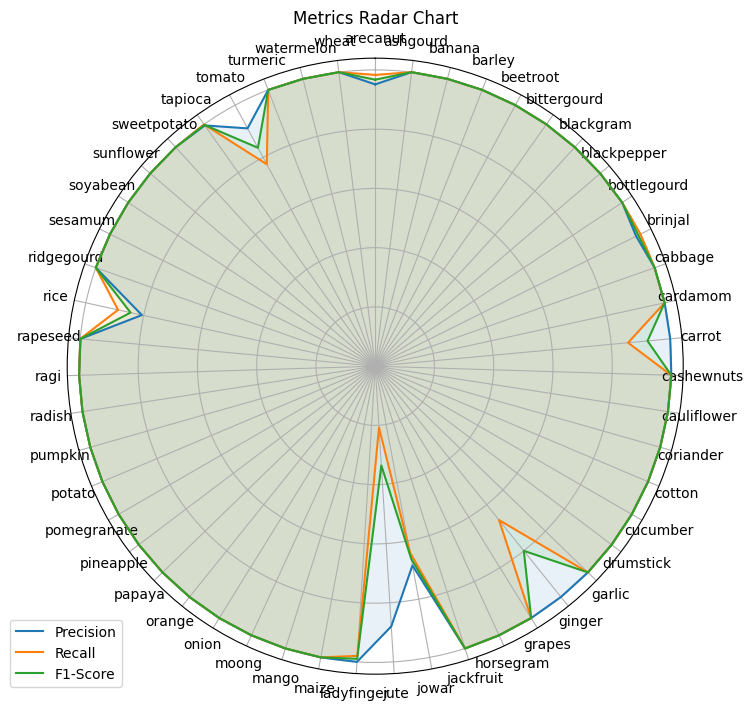

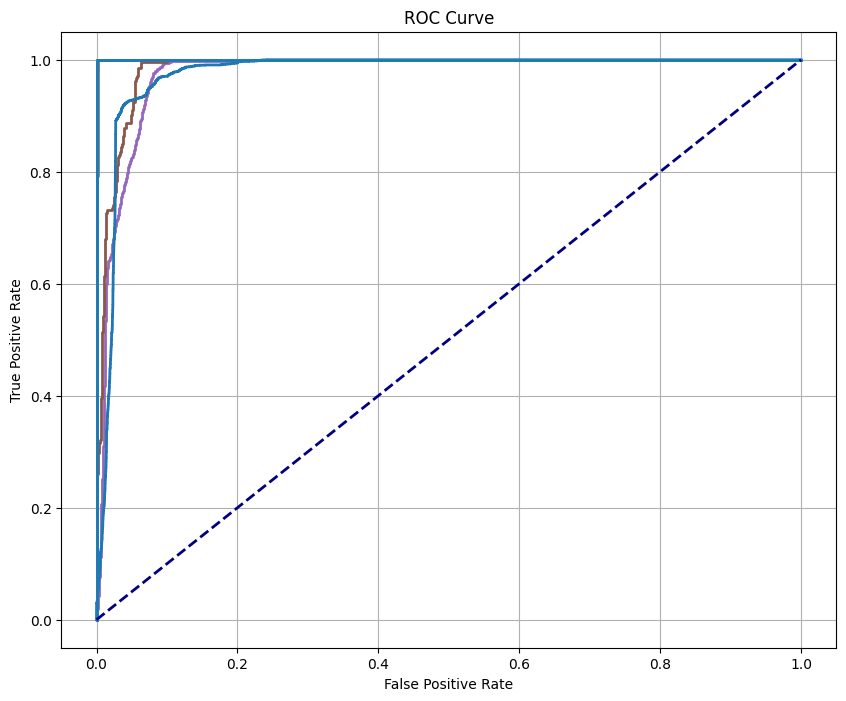

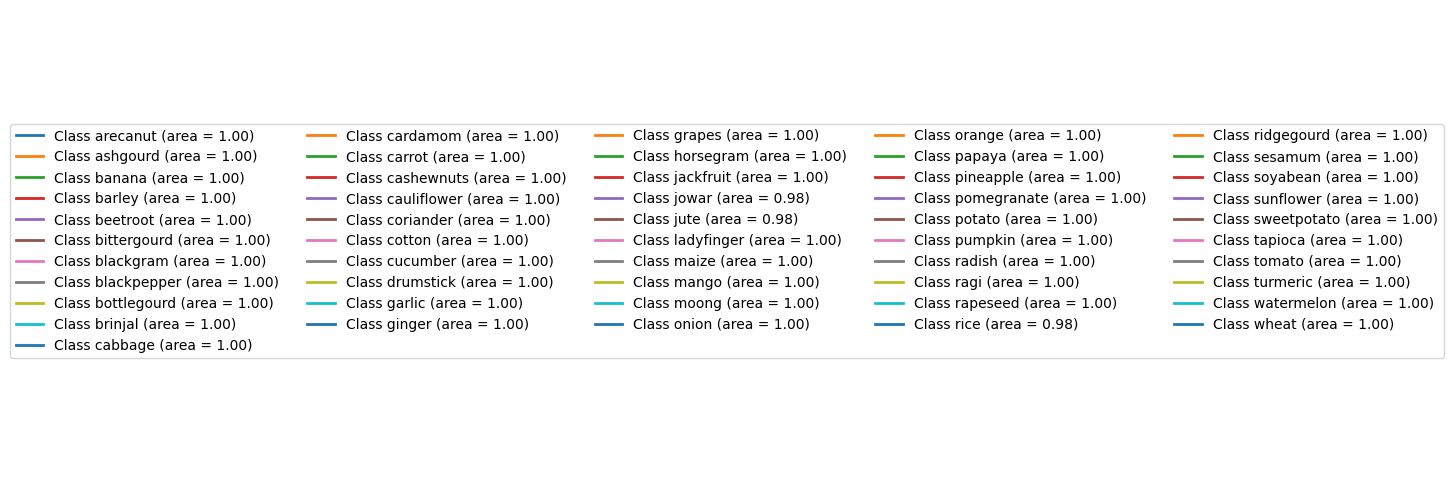

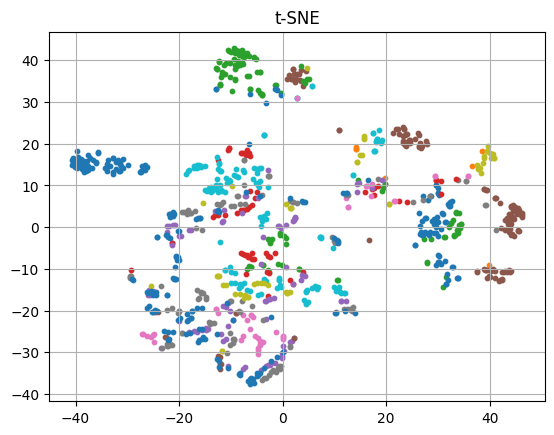

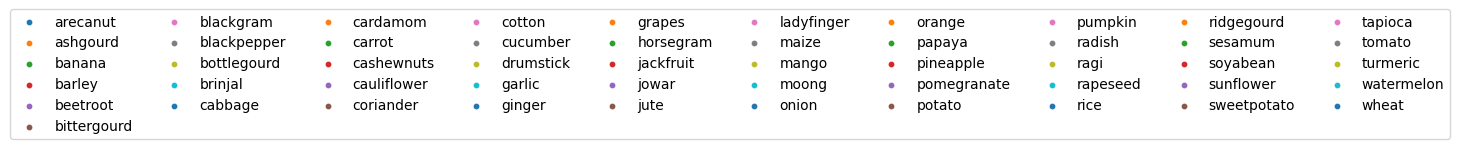

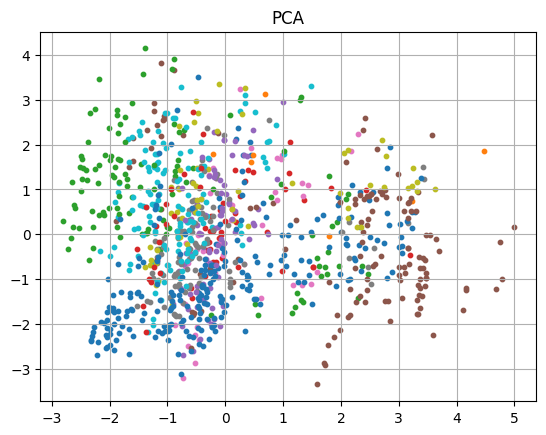

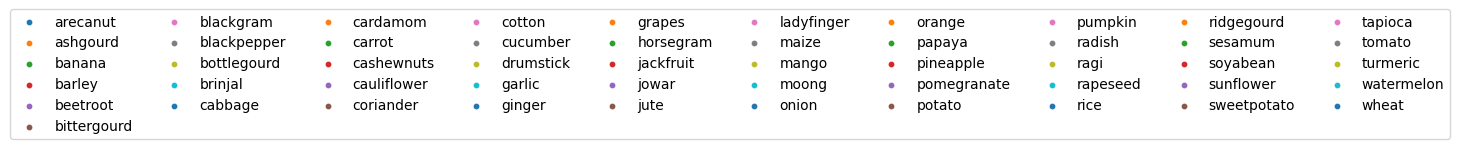

Fold 1, Train Accuracy: 96.10%, Validation Accuracy: 95.81%
Fold 1, Train Precision: 0.9606, Train Recall: 0.9610, Train Negative Rate: 0.9992, Train F1: 0.9588
Fold 1, Validation Precision: 0.9580, Validation Recall: 0.9581, Validation Negative Rate: 0.9991, Validation F1: 0.9559
Fold 2, Train Accuracy: 96.13%, Validation Accuracy: 96.13%
Fold 2, Train Precision: 0.9609, Train Recall: 0.9613, Train Negative Rate: 0.9992, Train F1: 0.9591
Fold 2, Validation Precision: 0.9620, Validation Recall: 0.9613, Validation Negative Rate: 0.9992, Validation F1: 0.9592
Fold 3, Train Accuracy: 96.11%, Validation Accuracy: 96.08%
Fold 3, Train Precision: 0.9605, Train Recall: 0.9611, Train Negative Rate: 0.9992, Train F1: 0.9588
Fold 3, Validation Precision: 0.9599, Validation Recall: 0.9608, Validation Negative Rate: 0.9991, Validation F1: 0.9590
Fold 4, Train Accuracy: 96.14%, Validation Accuracy: 96.23%
Fold 4, Train Precision: 0.9609, Train Recall: 0.9614, Train Negative Rate: 0.9992, Train F1: 

In [34]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

name = f"Simple_{model_name}"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model= train_validation(train_features, test_features, train_target, test_target,name)
df1 = cross_check(features,target,name)

In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values
print("Random OverSampler")
ROSample = RandomOverSampler(sampling_strategy="all")
features,target = ROSample.fit_resample(features,target)

name = f"{model_name}_RandomOver"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model= train_validation(train_features, test_features, train_target, test_target,name)
df2 = cross_check(features,target,name)

In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values
print("SMOTE")
ROSample = SMOTE()
features,target = ROSample.fit_resample(features,target)

name = f"{model_name}_SMOTE"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model= train_validation(train_features, test_features, train_target, test_target,name)
df4 = cross_check(features,target,name)

In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values
print("SMOTE + Tomek")
ROSample = SMOTETomek()
features,target = ROSample.fit_resample(features,target)


name = f"{model_name}_SMOTE+TOMEK"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model= train_validation(train_features, test_features, train_target, test_target,name)
df5 = cross_check(features,target,name)

In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values
print("SMOTEENN")
ROSample = SMOTEENN()
features,target = ROSample.fit_resample(features,target)


name = f"{model_name}_SMOTEENN"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model= train_validation(train_features, test_features, train_target, test_target,name)
df6 = cross_check(features,target,name)